# Basic EDA

Looking at each of the tables and asking/answering basic questions.

In [1]:
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from src.eda import COLORS, COLORS_DICT, nymyc_cmap, nymyc_cmap_r, read_all_csvs

mpl.colormaps.register(cmap=nymyc_cmap)
mpl.colormaps.register(cmap=nymyc_cmap_r)
nymyc_palette = sns.set_palette(sns.color_palette(COLORS))

# Show all columns in DataFrames
pd.set_option('display.max_columns', None)

# Auto-reload modules
%load_ext autoreload
%autoreload 2

**Read in the data**

In [2]:
%%time
dfs = read_all_csvs('./data')
print(dfs.keys())

[*] Reading in Parks.csv...
[*] Reading in BroadGroups.csv...
[*] Reading in Parks_Properties_20241008.csv...
[*] Reading in Mushroom.csv...
[*] Reading in Walks.csv...
[*] Reading in Observations.csv...
dict_keys(['parks', 'broadgroups', 'parks_properties_20241008', 'mushroom', 'walks', 'observations'])
CPU times: user 318 ms, sys: 54 ms, total: 372 ms
Wall time: 602 ms


In [3]:
for df in list(dfs.keys()):
    print(df.upper())
    display(dfs[df].head())
    print('\n----------\n')

PARKS


,ParkID,ParkName,Borough,City,State
0,11,Pelham Bay Park,Bronx,New York City,NY
1,12,High Rock Park,Staten Island,New York City,NY
2,13,Prospect Park,Brooklyn,New York City,NY
3,14,Seton Falls Park,Bronx,New York City,NY
4,15,Kissena Park,Queens,New York City,NY



----------

BROADGROUPS


,BroadGroupID,BroadGroupName,BroadGroupDesc
0,1,Ascomycetes,Ascomycetes are fungi that form sexual spores ...
1,2,Toothed Fungi,Toothed Fungi are a polyphyletic group of Basi...
2,3,Boletes,NaN
3,4,Chanterelles & Allies,NaN
4,5,Coral & Club Fungi,NaN



----------

MUSHROOM


,MushroomID,BroadGroupID,Genus,Species,WhyOrWhyNot,DateCreated,DateModified
0,3,3,Cyanoboletus,pulverulentus,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56
1,4,3,Gyroporus,castaneus,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56
2,5,3,Tylopilus,ferrugineus,other,2020-04-12 16:53:56,2021-06-24 15:59:48
3,6,3,Xerocomellus,chrysenteron,other,2020-04-12 16:53:56,2021-06-24 19:00:51
4,7,5,Clavulina,cinerea,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56



----------

WALKS


,WalkID,ParkID,WalkDate,WalkDescription,WalkPhoto,DateCreated,DateModified
0,1,19,2009-06-28,This is the first walk for which we have data....,NaN,2023-12-13 16:18:04,2023-12-13 16:18:04
1,2,11,2009-07-11,,NaN,2021-06-24 16:22:14,2021-06-24 16:22:14
2,3,20,2009-07-12,,NaN,2021-08-23 12:32:49,2021-08-23 12:32:49
3,4,19,2010-06-27,,NaN,2022-10-28 10:15:11,2022-10-28 10:15:11
4,5,21,2010-08-07,,NaN,2021-08-10 19:06:38,2021-08-10 19:06:38



----------

OBSERVATIONS


,ObservationID,MushroomID,WalkID,ParkID,NewToPark,NewToCity,Notes,LinkToINat,DateCreated,DateModified
0,1,300,1,19,y,y,as Boletus campestris,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
1,2,2329,1,19,y,y,NaN,NaN,2023-12-13 21:15:44,2023-12-13 21:15:44
2,3,3,1,19,y,y,(Boletus) pulverulentus,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
3,4,4,1,19,y,y,NaN,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
4,5,5,1,19,y,y,NaN,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21



----------



## EDA

Poking around in the data to see what's there, answering some questions that come up.

### Parks

What parks are there? How many per borough?

In [4]:
parks = dfs['parks']
parks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ParkID    34 non-null     int64 
 1   ParkName  34 non-null     object
 2   Borough   19 non-null     object
 3   City      29 non-null     object
 4   State     34 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB


What's up with those null Borough and City rows?

In [5]:
parks.loc[parks['Borough'].isna() | parks['City'].isna()]

,ParkID,ParkName,Borough,City,State
9,21,"Stony Brook, Long Island",NaN,NaN,NY
13,25,"Stony Brook, Harriman",NaN,Sloatsburg,NY
16,28,Tallman State Park,NaN,Palisades,NY
18,30,Beech Brook,NaN,NaN,NY
19,31,Fahnestock State Park,NaN,NaN,NY
20,32,South Mountain Reservation,NaN,NaN,NJ
22,34,Norvin Green State Forest,NaN,NaN,NJ
23,35,Depew Park,NaN,Peekskill,NY
24,36,Devil's Den Preserve,NaN,Weston,CT
26,38,Mt. Lakes Park,NaN,North Salem,NY


So this dataset includes observations from parks outside of NYC. For a first pass at EDA/answering some questions, we should probably drop those.

In [6]:
parks.groupby('Borough')['ParkName'].nunique()

Borough
Bronx            4
Brooklyn         2
Manhattan        3
Queens           4
Staten Island    6
Name: ParkName, dtype: int64

### Broad Groups

In [7]:
groups = dfs['broadgroups']
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BroadGroupID    20 non-null     int64 
 1   BroadGroupName  20 non-null     object
 2   BroadGroupDesc  7 non-null      object
dtypes: int64(1), object(2)
memory usage: 612.0+ bytes


In [8]:
groups.head()

,BroadGroupID,BroadGroupName,BroadGroupDesc
0,1,Ascomycetes,Ascomycetes are fungi that form sexual spores ...
1,2,Toothed Fungi,Toothed Fungi are a polyphyletic group of Basi...
2,3,Boletes,NaN
3,4,Chanterelles & Allies,NaN
4,5,Coral & Club Fungi,NaN


Some nulls in description, but not necessary to deal with right now.

### Mushrooms

In [9]:
mushrooms = dfs['mushroom']
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MushroomID    1970 non-null   int64         
 1   BroadGroupID  1970 non-null   int64         
 2   Genus         1968 non-null   object        
 3   Species       1966 non-null   object        
 4   WhyOrWhyNot   411 non-null    object        
 5   DateCreated   1970 non-null   datetime64[ns]
 6   DateModified  1970 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 107.9+ KB


What is `WhyOrWhyNot`???

In [10]:
mushrooms['WhyOrWhyNot'].value_counts()

WhyOrWhyNot
other                         224
misidentification              18
deprecated                      6
wrong group                     4
replaced mushroom id 1091.      3
                             ... 
replaced mushroom id 653.       1
replaced mushroom id 1196.      1
replaced mushroom id 1183.      1
replaced mushroom id 630.       1
replaced mushroom id 3018.      1
Name: count, Length: 159, dtype: int64

Seems to be some kind of metadata field where the data is altered after the observation event?

In [11]:
mushrooms.head()

,MushroomID,BroadGroupID,Genus,Species,WhyOrWhyNot,DateCreated,DateModified
0,3,3,Cyanoboletus,pulverulentus,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56
1,4,3,Gyroporus,castaneus,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56
2,5,3,Tylopilus,ferrugineus,other,2020-04-12 16:53:56,2021-06-24 15:59:48
3,6,3,Xerocomellus,chrysenteron,other,2020-04-12 16:53:56,2021-06-24 19:00:51
4,7,5,Clavulina,cinerea,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56


How many mushrooms are there per broad group?

In [12]:
pd.DataFrame(mushrooms.merge(groups, on='BroadGroupID', how='left').groupby('BroadGroupName')['MushroomID'].nunique())

,MushroomID
BroadGroupName,
Ascomycetes,468
Atractiellomycetes,2
Boletes,127
Chanterelles & Allies,13
Coral & Club Fungi,40
Crusts & Parchment,155
Cyphelloid Fungi,9
Dimorphic Fungi,1
Fiber Fans & Vases,6


## Research Questions

The following questions come from the draft report.

### Common
 - **What are the most common fungi in the city (by form group)?**
 - Which fungi do we see in almost every park?
 - Are any species localized to one or two parks?
 - What are the most common fungi per season?
 - **What fungi is consistently seen all year long?**

### Rare
 - What discoveries were shocking or noteable? (Ex: first ones found, rare fungi, fungi in atypical location)
 - What’s the rarest species in the city, by form group?
 - **Which parks are the most fungally diverse?** 

### New
 - At what rate are we adding new species to our lists? 

### Observations per Species
 - What’s been seen? Where?
 - Are there species that are becoming more common? 
 - **Is anything on a decline / are there any species becoming observed less frequently?**

### Additional ideas:
 - What’s the most common fungi per borough?
 - **How does NYC compare with other urban areas (using iNat data) - either in reporting style or actual species?**
 - How do temperature impact discoveries (bringing in temperature data for each walk)?
 - Controlling for above biases, what locations and seasons show the most abundance?
 - Are there potential environmental factors, like substrate or surrounding environment, within parks that correlate with higher fungal diversity or specific fungi? (Might need to work with a local expert on this)
 - Could we profile some of the people that make it all happen?
 - Could we profile some of our most interesting discoveries?

## Common

### What are the most common fungi in the city (by form group)?

''

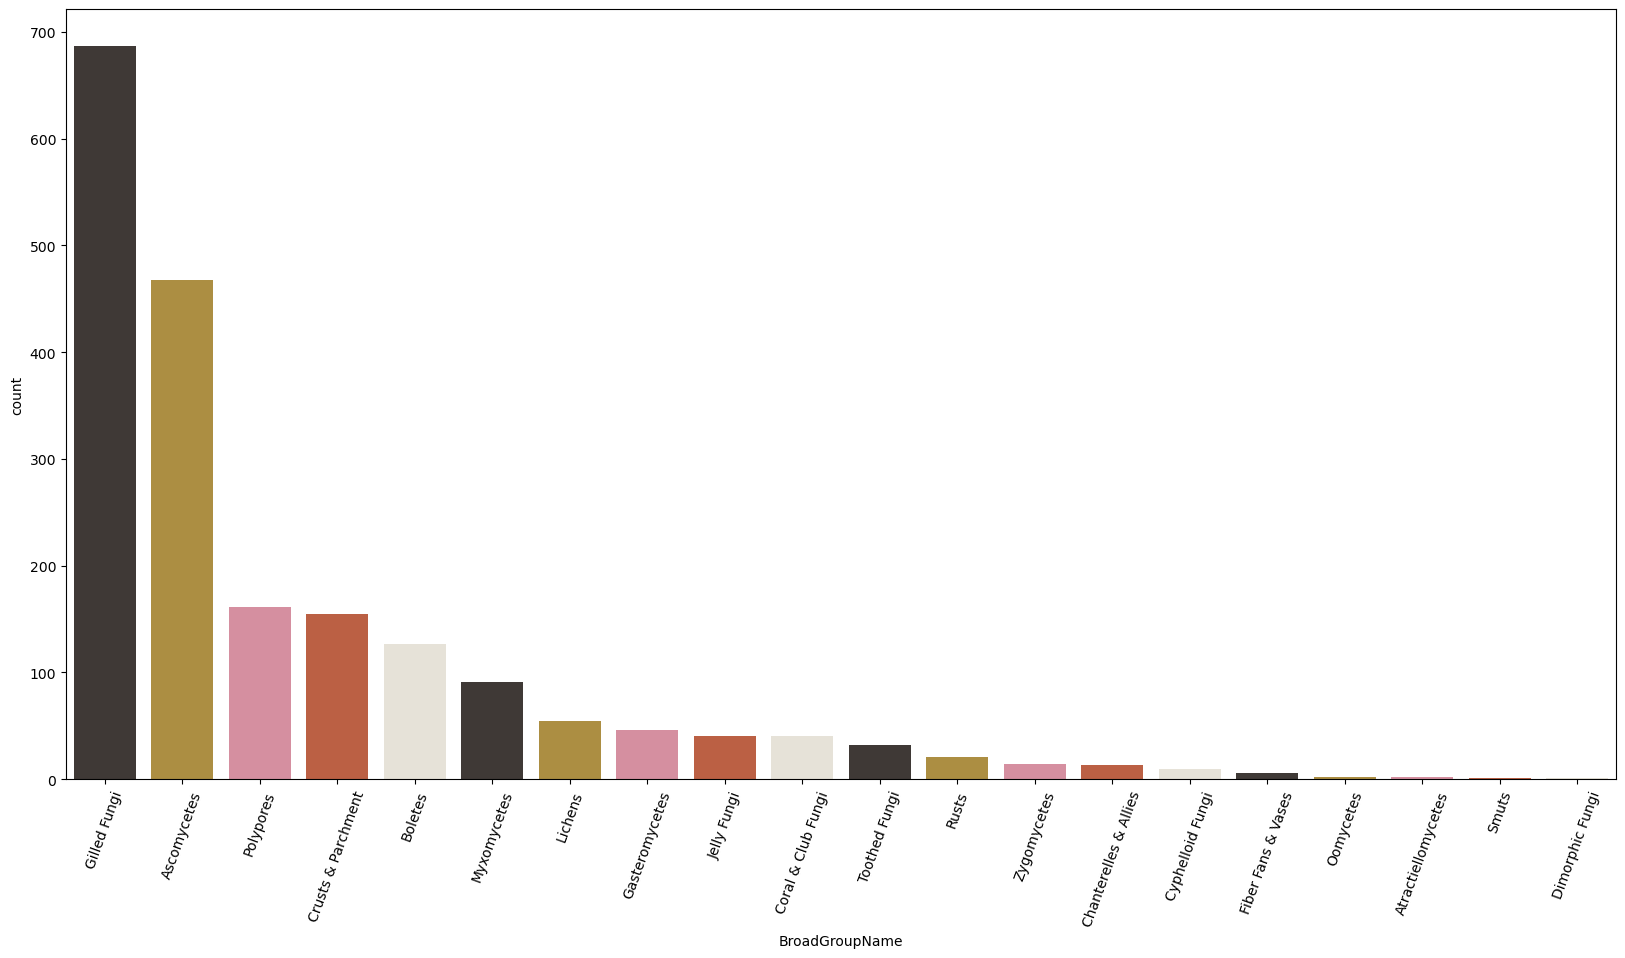

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
group_counts = mushrooms.merge(groups, on='BroadGroupID', how='left')
sns.countplot(data=group_counts, x='BroadGroupName', order=group_counts['BroadGroupName'].value_counts().index, 
              palette=COLORS, ax=ax)
plt.xticks(rotation=70)
;

**Can we break that down by Borough instead?** For this, we'll need:
 - Observations: this will serve as the base table b/c it has the mushroom IDs and the park IDs
 - LEFT JOIN mushrooms on `MushroomID`
 - LEFT JOIN groups on `BroadGroupID`

In [15]:
dfs['observations'].head()

,ObservationID,MushroomID,WalkID,ParkID,NewToPark,NewToCity,Notes,LinkToINat,DateCreated,DateModified
0,1,300,1,19,y,y,as Boletus campestris,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
1,2,2329,1,19,y,y,NaN,NaN,2023-12-13 21:15:44,2023-12-13 21:15:44
2,3,3,1,19,y,y,(Boletus) pulverulentus,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
3,4,4,1,19,y,y,NaN,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
4,5,5,1,19,y,y,NaN,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21


In [16]:
parks.head()

,ParkID,ParkName,Borough,City,State
0,11,Pelham Bay Park,Bronx,New York City,NY
1,12,High Rock Park,Staten Island,New York City,NY
2,13,Prospect Park,Brooklyn,New York City,NY
3,14,Seton Falls Park,Bronx,New York City,NY
4,15,Kissena Park,Queens,New York City,NY


In [29]:
observations = dfs['observations'].merge(mushrooms[['MushroomID','BroadGroupID','Genus','Species']], 
                                         on='MushroomID', how='left')\
                                  .merge(groups[['BroadGroupID','BroadGroupName']], on='BroadGroupID', how='left')\
                                  .merge(parks[['ParkID','ParkName','Borough']].dropna(), on='ParkID', how='left')\
                                  .drop(['Notes','LinkToINat','DateCreated','DateModified'], axis=1)
observations.head()

,ObservationID,MushroomID,WalkID,ParkID,NewToPark,NewToCity,BroadGroupID,Genus,Species,BroadGroupName,ParkName,Borough
0,1,300,1,19,y,y,3.0,Hortiboletus,campestris,Boletes,Central Park,Manhattan
1,2,2329,1,19,y,y,3.0,Boletus,subvelutipes-complex,Boletes,Central Park,Manhattan
2,3,3,1,19,y,y,3.0,Cyanoboletus,pulverulentus,Boletes,Central Park,Manhattan
3,4,4,1,19,y,y,3.0,Gyroporus,castaneus,Boletes,Central Park,Manhattan
4,5,5,1,19,y,y,3.0,Tylopilus,ferrugineus,Boletes,Central Park,Manhattan


''

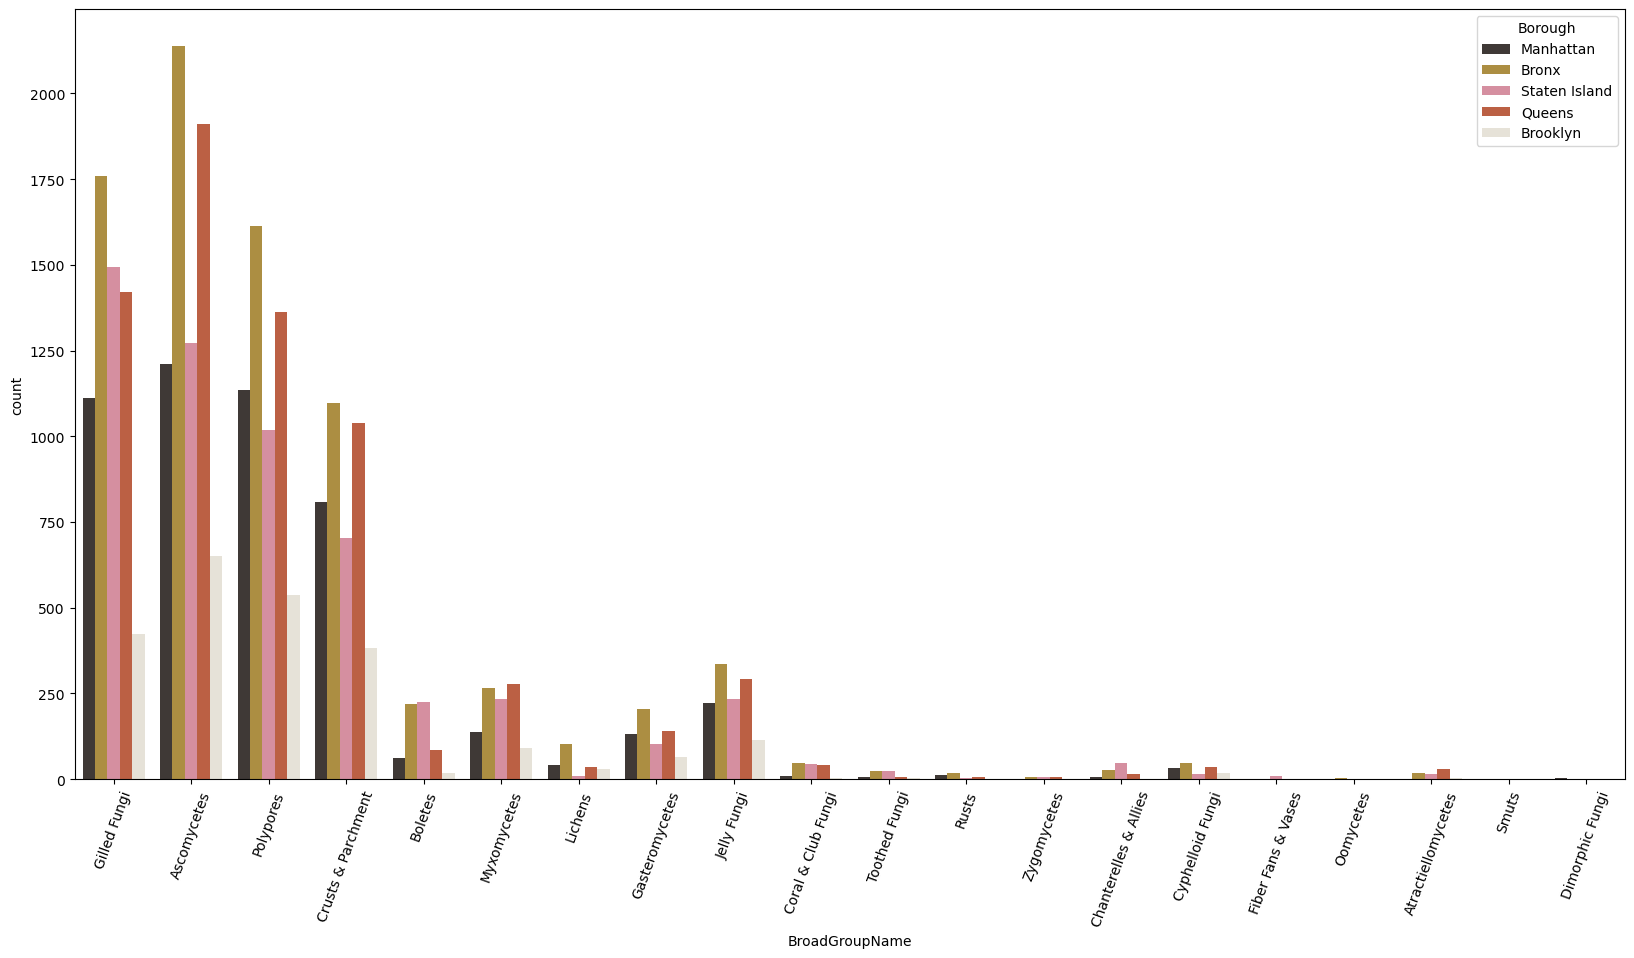

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(observations, x="BroadGroupName", hue="Borough", 
              order=group_counts['BroadGroupName'].value_counts().index,
              palette=COLORS
             )
plt.xticks(rotation=70)
;

What about by park? For this, perhaps it would be best to simply display the top 3 broad group names per park

In [31]:
observations.head()

,ObservationID,MushroomID,WalkID,ParkID,NewToPark,NewToCity,BroadGroupID,Genus,Species,BroadGroupName,ParkName,Borough
0,1,300,1,19,y,y,3.0,Hortiboletus,campestris,Boletes,Central Park,Manhattan
1,2,2329,1,19,y,y,3.0,Boletus,subvelutipes-complex,Boletes,Central Park,Manhattan
2,3,3,1,19,y,y,3.0,Cyanoboletus,pulverulentus,Boletes,Central Park,Manhattan
3,4,4,1,19,y,y,3.0,Gyroporus,castaneus,Boletes,Central Park,Manhattan
4,5,5,1,19,y,y,3.0,Tylopilus,ferrugineus,Boletes,Central Park,Manhattan


In [32]:
observations.groupby(['ParkName','BroadGroupName']).filter(lambda x: len(x) > 5)

,ObservationID,MushroomID,WalkID,ParkID,NewToPark,NewToCity,BroadGroupID,Genus,Species,BroadGroupName,ParkName,Borough
0,1,300,1,19,y,y,3.0,Hortiboletus,campestris,Boletes,Central Park,Manhattan
1,2,2329,1,19,y,y,3.0,Boletus,subvelutipes-complex,Boletes,Central Park,Manhattan
2,3,3,1,19,y,y,3.0,Cyanoboletus,pulverulentus,Boletes,Central Park,Manhattan
3,4,4,1,19,y,y,3.0,Gyroporus,castaneus,Boletes,Central Park,Manhattan
4,5,5,1,19,y,y,3.0,Tylopilus,ferrugineus,Boletes,Central Park,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...
33295,34770,1198,571,24,NaN,NaN,12.0,Trametes,cinnabarina,Polypores,Inwood Hill Park,Manhattan
33296,34771,193,571,24,NaN,NaN,12.0,Trametes,conchifer,Polypores,Inwood Hill Park,Manhattan
33297,34772,208,571,24,NaN,NaN,12.0,Trametes,gibbosa,Polypores,Inwood Hill Park,Manhattan
33298,34773,194,571,24,NaN,NaN,12.0,Trametes,versicolor,Polypores,Inwood Hill Park,Manhattan


In [33]:
observations.groupby('ParkName')['BroadGroupName'].value_counts()
# ['BroadGroupName'].value_counts(normalize=True)

ParkName           BroadGroupName       
Alley Pond Park    Ascomycetes              565
                   Gilled Fungi             439
                   Polypores                373
                   Crusts & Parchment       276
                   Myxomycetes               75
                                           ... 
Woodlawn Cemetery  Myxomycetes                9
                   Coral & Club Fungi         7
                   Toothed Fungi              3
                   Chanterelles & Allies      2
                   Cyphelloid Fungi           2
Name: count, Length: 250, dtype: int64

In [34]:
observations.groupby('ParkName')['BroadGroupName'].value_counts(normalize=True)

ParkName           BroadGroupName       
Alley Pond Park    Ascomycetes              0.294424
                   Gilled Fungi             0.228765
                   Polypores                0.194372
                   Crusts & Parchment       0.143825
                   Myxomycetes              0.039083
                                              ...   
Woodlawn Cemetery  Myxomycetes              0.011139
                   Coral & Club Fungi       0.008663
                   Toothed Fungi            0.003713
                   Chanterelles & Allies    0.002475
                   Cyphelloid Fungi         0.002475
Name: proportion, Length: 250, dtype: float64

''

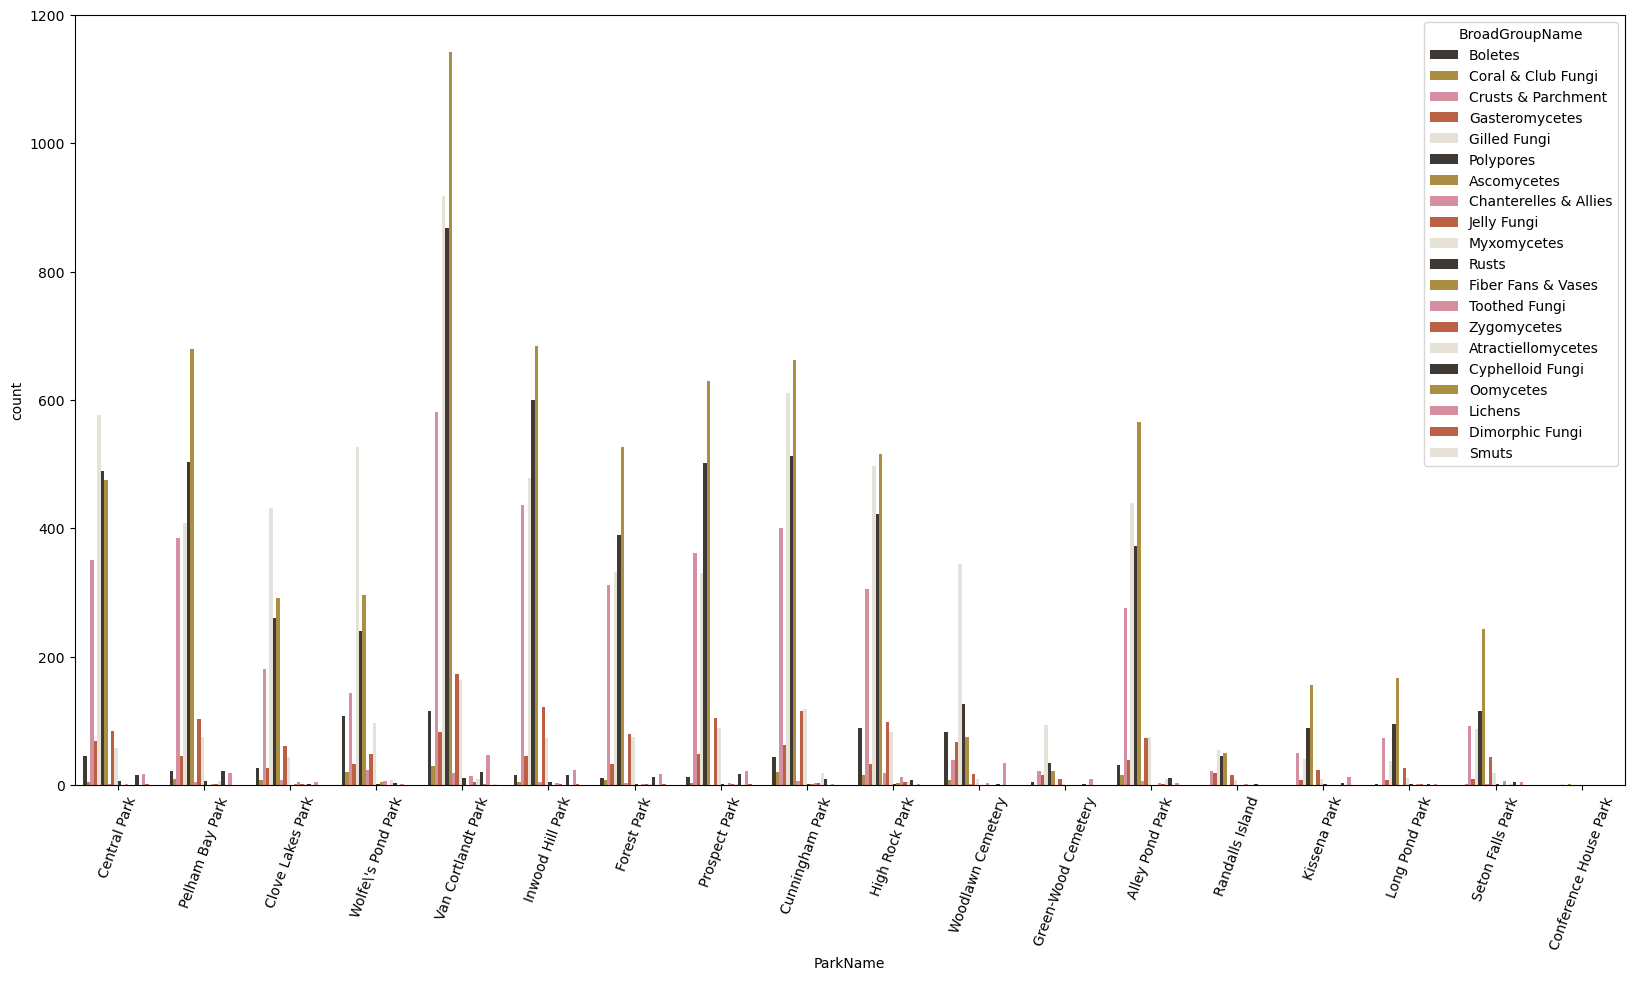

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(observations, x="ParkName", hue="BroadGroupName", palette=COLORS)
plt.xticks(rotation=70)
;

### What fungi is consistently seen all year long?

Try by `BoradGroupName` in addition to `Genus` and `Species`.

In [37]:
observations = dfs['observations'].merge(dfs['mushroom'][['MushroomID','BroadGroupID','Genus','Species']], 
                                         on='MushroomID', how='left')\
                                  .merge(dfs['broadgroups'][['BroadGroupID','BroadGroupName']], on='BroadGroupID', how='left')\
                                  .drop(['Notes','LinkToINat','NewToPark','NewToCity','ParkID',
                                         'WalkID','ObservationID','DateModified'], axis=1)
observations['Date'] = observations['DateCreated'].dt.normalize()
observations['Month'] = observations['DateCreated'].dt.month
observations.head()

,MushroomID,DateCreated,BroadGroupID,Genus,Species,BroadGroupName,Date,Month
0,300,2023-12-11 16:39:21,3.0,Hortiboletus,campestris,Boletes,2023-12-11,12
1,2329,2023-12-13 21:15:44,3.0,Boletus,subvelutipes-complex,Boletes,2023-12-13,12
2,3,2023-12-11 16:39:21,3.0,Cyanoboletus,pulverulentus,Boletes,2023-12-11,12
3,4,2023-12-11 16:39:21,3.0,Gyroporus,castaneus,Boletes,2023-12-11,12
4,5,2023-12-11 16:39:21,3.0,Tylopilus,ferrugineus,Boletes,2023-12-11,12


In [38]:
observations['Month'].value_counts()

Month
12    31410
1       957
4       447
3       302
2       189
Name: count, dtype: int64

''

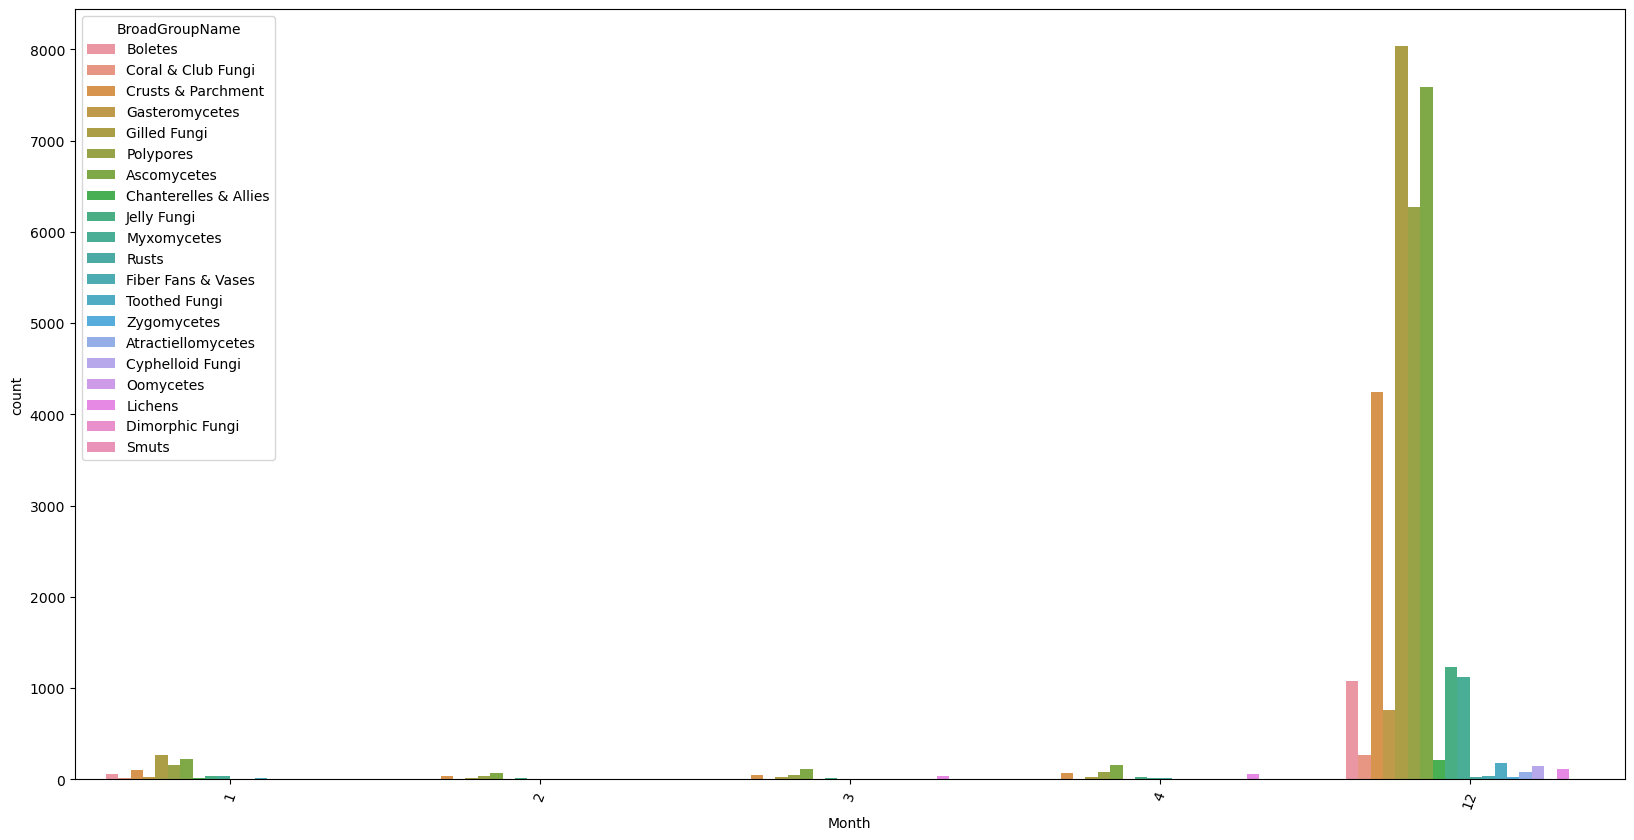

In [40]:
# Sanity check for dates
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(observations, x='Month', hue='BroadGroupName')
plt.xticks(rotation=70)
;

Something is going on with the data here--why are there so many more observations from last December, and specifically December 10?

*Solved:* It turns out that the `Observations` table dates only go back to December 2023, perhaps when the table itself was populated, but they do link to observations from `Walks` dating back to 2009. Don't use the date columns from the `Observations` table to timestamp specific mushroom observations. Instead, join in `Walks` and use the `WalkDate`.

In [41]:
observations = dfs['observations'].merge(dfs['mushroom'][['MushroomID','BroadGroupID','Genus','Species']], 
                                         on='MushroomID', how='left')\
                                  .merge(dfs['broadgroups'][['BroadGroupID','BroadGroupName']], on='BroadGroupID', how='left')\
                                  .merge(dfs['walks'][['WalkID','ParkID','WalkDate']])\
                                  .drop(['Notes','LinkToINat','NewToPark','NewToCity','ParkID',
                                         'WalkID','ObservationID','DateCreated','DateModified'], axis=1)
observations['Date'] = observations['WalkDate'].dt.normalize()
months = {1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June',
          7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
observations['Month'] = observations['WalkDate'].dt.month.map(months)
observations.head()

,MushroomID,BroadGroupID,Genus,Species,BroadGroupName,WalkDate,Date,Month
0,300,3.0,Hortiboletus,campestris,Boletes,2009-06-28,2009-06-28,June
1,2329,3.0,Boletus,subvelutipes-complex,Boletes,2009-06-28,2009-06-28,June
2,3,3.0,Cyanoboletus,pulverulentus,Boletes,2009-06-28,2009-06-28,June
3,4,3.0,Gyroporus,castaneus,Boletes,2009-06-28,2009-06-28,June
4,5,3.0,Tylopilus,ferrugineus,Boletes,2009-06-28,2009-06-28,June


In [42]:
observations['Date'].describe()

count                            33136
mean     2018-11-16 11:30:50.410429440
min                2009-06-28 00:00:00
25%                2016-05-08 00:00:00
50%                2018-11-17 00:00:00
75%                2022-04-02 00:00:00
max                2024-04-13 00:00:00
Name: Date, dtype: object

In [43]:
observations['Month'].value_counts()

Month
July     4223
Aug      3659
Oct      3524
Nov      3185
June     2892
Sep      2831
Jan      2537
Dec      2336
March    2266
May      1945
Feb      1914
April    1824
Name: count, dtype: int64

That's much better. Now we can actually attempt to answer the question.

In [44]:
# https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas
df = observations.groupby(['Month']).BroadGroupName.value_counts().groupby(level=0, group_keys=False).head(5)
df

Month  BroadGroupName    
April  Ascomycetes            650
       Polypores              443
       Crusts & Parchment     304
       Gilled Fungi           173
       Jelly Fungi            102
Aug    Gilled Fungi          1299
       Ascomycetes            592
       Polypores              517
       Boletes                406
       Crusts & Parchment     265
Dec    Ascomycetes            689
       Polypores              509
       Crusts & Parchment     450
       Gilled Fungi           394
       Jelly Fungi            132
Feb    Ascomycetes            695
       Polypores              452
       Crusts & Parchment     344
       Gilled Fungi           171
       Jelly Fungi            114
Jan    Ascomycetes            838
       Polypores              589
       Crusts & Parchment     473
       Gilled Fungi           304
       Jelly Fungi            159
July   Gilled Fungi          1461
       Ascomycetes            723
       Polypores              668
       Boletes        

''

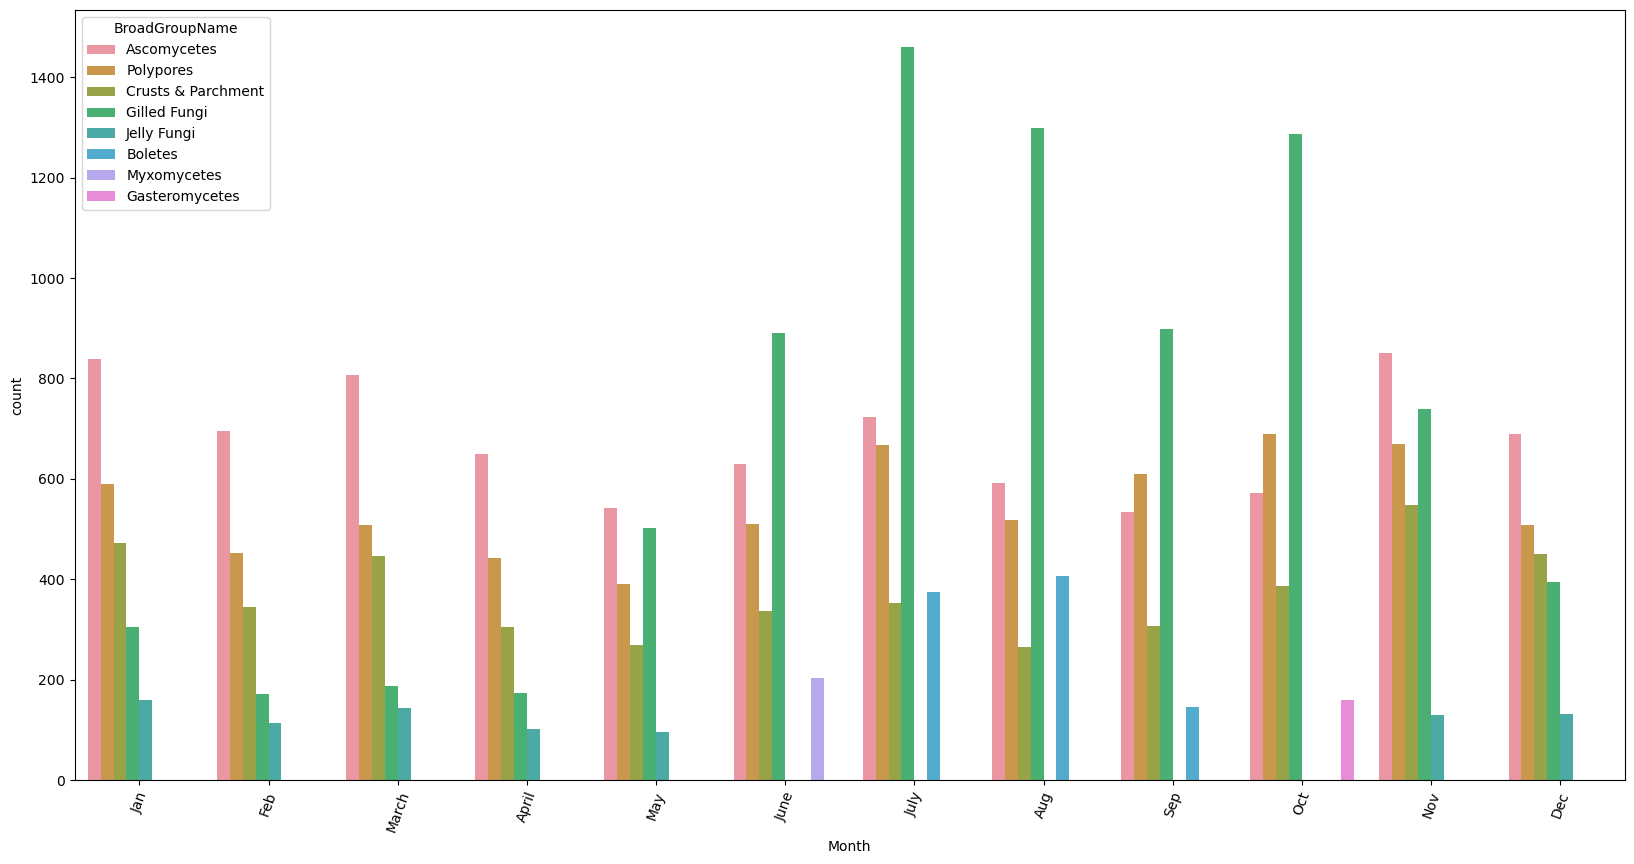

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
df = (
    observations
    .groupby(['Month'])
    .BroadGroupName.value_counts()
    .groupby(level=0, group_keys=False).head(5)
    .reset_index()
)
sns.barplot(df, x='Month', y='count', hue='BroadGroupName', 
            order=months.values())
plt.xticks(rotation=70)
;

Unsurprisingly, **Gilled Fungi** are the most commonly found late spring through fall. However, **Ascomycetes** and **Polypores** are, perhaps also unsurprisingly, the most commonly found overall all year long.

''

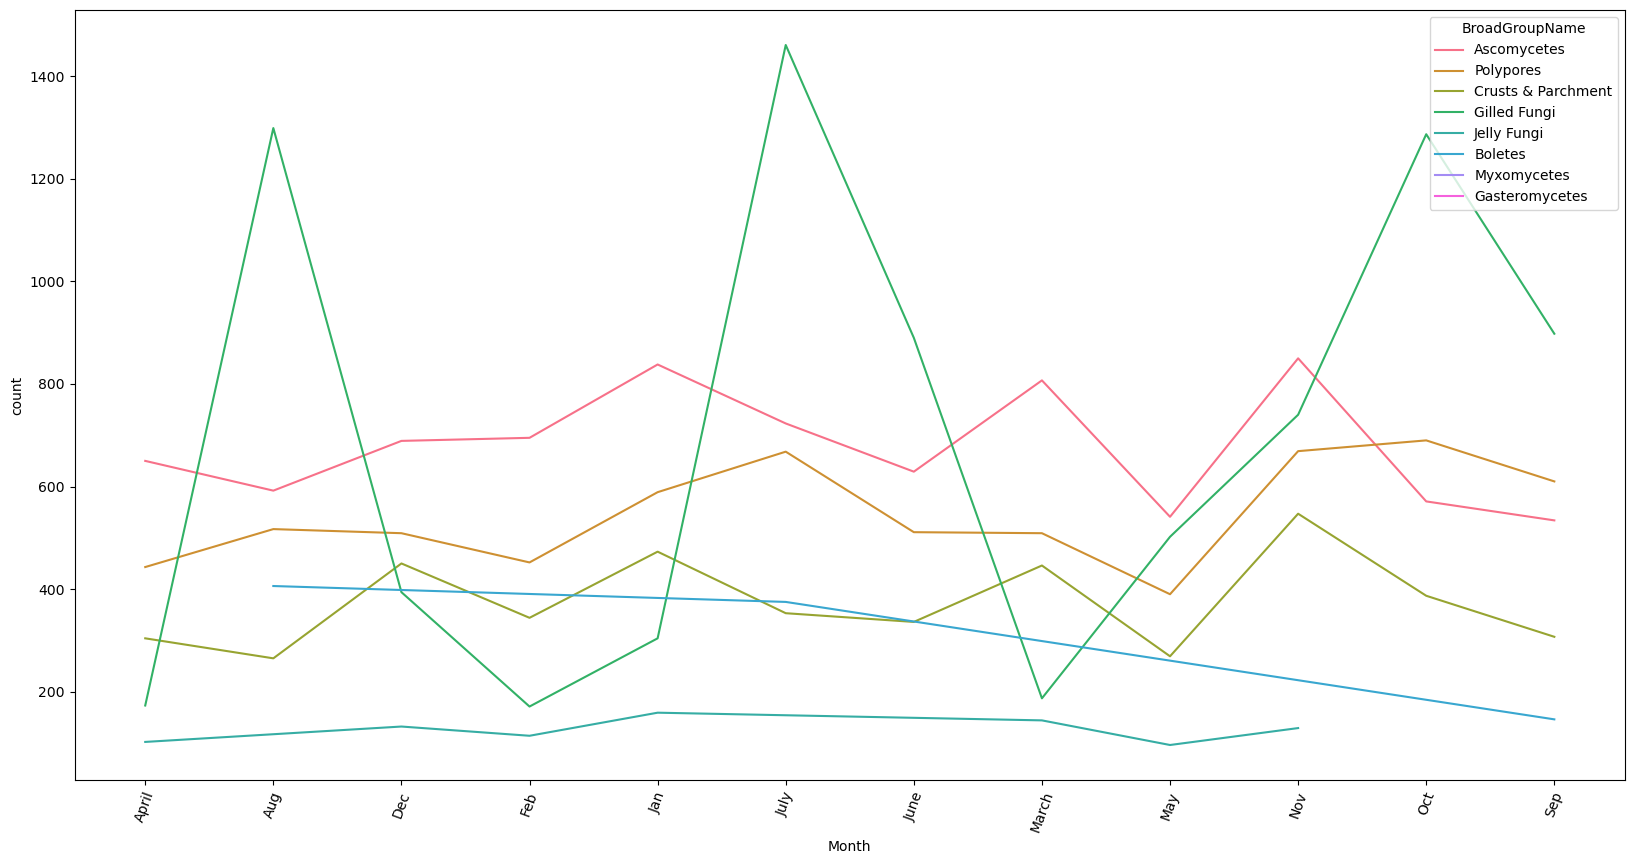

In [48]:
fig, ax = plt.subplots(figsize=(20,10))
df = (
    observations
    .groupby(['Month'])
    .BroadGroupName.value_counts()
    .groupby(level=0, group_keys=False).head(5)
    .reset_index()
)
sns.lineplot(df, x='Month', y='count', hue='BroadGroupName') #, order=months.values())
plt.xticks(rotation=70)
;

Need to fix month order. Perhaps translate months back into numbers (1-12) and then use a string formatter/mapping function in the actual drawing of the axis.

### Which parks are the most fungally diverse?

In [49]:
for table in list(dfs.keys()):
    print(table.upper())
    display(dfs[table].head())
    print('\n----------\n')

PARKS


,ParkID,ParkName,Borough,City,State
0,11,Pelham Bay Park,Bronx,New York City,NY
1,12,High Rock Park,Staten Island,New York City,NY
2,13,Prospect Park,Brooklyn,New York City,NY
3,14,Seton Falls Park,Bronx,New York City,NY
4,15,Kissena Park,Queens,New York City,NY



----------

BROADGROUPS


,BroadGroupID,BroadGroupName,BroadGroupDesc
0,1,Ascomycetes,Ascomycetes are fungi that form sexual spores ...
1,2,Toothed Fungi,Toothed Fungi are a polyphyletic group of Basi...
2,3,Boletes,NaN
3,4,Chanterelles & Allies,NaN
4,5,Coral & Club Fungi,NaN



----------

MUSHROOM


,MushroomID,BroadGroupID,Genus,Species,WhyOrWhyNot,DateCreated,DateModified
0,3,3,Cyanoboletus,pulverulentus,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56
1,4,3,Gyroporus,castaneus,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56
2,5,3,Tylopilus,ferrugineus,other,2020-04-12 16:53:56,2021-06-24 15:59:48
3,6,3,Xerocomellus,chrysenteron,other,2020-04-12 16:53:56,2021-06-24 19:00:51
4,7,5,Clavulina,cinerea,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56



----------

WALKS


,WalkID,ParkID,WalkDate,WalkDescription,WalkPhoto,DateCreated,DateModified
0,1,19,2009-06-28,This is the first walk for which we have data....,NaN,2023-12-13 16:18:04,2023-12-13 16:18:04
1,2,11,2009-07-11,,NaN,2021-06-24 16:22:14,2021-06-24 16:22:14
2,3,20,2009-07-12,,NaN,2021-08-23 12:32:49,2021-08-23 12:32:49
3,4,19,2010-06-27,,NaN,2022-10-28 10:15:11,2022-10-28 10:15:11
4,5,21,2010-08-07,,NaN,2021-08-10 19:06:38,2021-08-10 19:06:38



----------

OBSERVATIONS


,ObservationID,MushroomID,WalkID,ParkID,NewToPark,NewToCity,Notes,LinkToINat,DateCreated,DateModified
0,1,300,1,19,y,y,as Boletus campestris,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
1,2,2329,1,19,y,y,NaN,NaN,2023-12-13 21:15:44,2023-12-13 21:15:44
2,3,3,1,19,y,y,(Boletus) pulverulentus,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
3,4,4,1,19,y,y,NaN,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
4,5,5,1,19,y,y,NaN,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21



----------



In [50]:
%%time
parks = (
    dfs['observations']
    .merge(dfs['parks'], on='ParkID', how='left')
    .merge(dfs['mushroom'][['MushroomID','BroadGroupID','Genus','Species']], on='MushroomID', how='left')
    .merge(dfs['broadgroups'][['BroadGroupID','BroadGroupName']], on='BroadGroupID', how='left')
    .drop(['Notes','LinkToINat','ParkID','WalkID',
           'ObservationID','DateCreated','DateModified'], axis=1)
)
parks['Genus'] = parks['Genus'].str.strip()
parks['Species'] = parks['Species'].str.strip()
parks['FullName'] = parks.apply(lambda x: f"{x['Genus']} {x['Species']}", axis=1)
parks.head()

CPU times: user 373 ms, sys: 25.5 ms, total: 399 ms
Wall time: 418 ms


,MushroomID,NewToPark,NewToCity,ParkName,Borough,City,State,BroadGroupID,Genus,Species,BroadGroupName,FullName
0,300,y,y,Central Park,Manhattan,New York City,NY,3.0,Hortiboletus,campestris,Boletes,Hortiboletus campestris
1,2329,y,y,Central Park,Manhattan,New York City,NY,3.0,Boletus,subvelutipes-complex,Boletes,Boletus subvelutipes-complex
2,3,y,y,Central Park,Manhattan,New York City,NY,3.0,Cyanoboletus,pulverulentus,Boletes,Cyanoboletus pulverulentus
3,4,y,y,Central Park,Manhattan,New York City,NY,3.0,Gyroporus,castaneus,Boletes,Gyroporus castaneus
4,5,y,y,Central Park,Manhattan,New York City,NY,3.0,Tylopilus,ferrugineus,Boletes,Tylopilus ferrugineus


In [51]:
parks.groupby('ParkName').BroadGroupName.nunique().reset_index().head()

,ParkName,BroadGroupName
0,Alley Pond Park,15
1,Beech Brook,14
2,Central Park,15
3,Clove Lakes Park,16
4,Collis P. Huntingdon Park,14


''

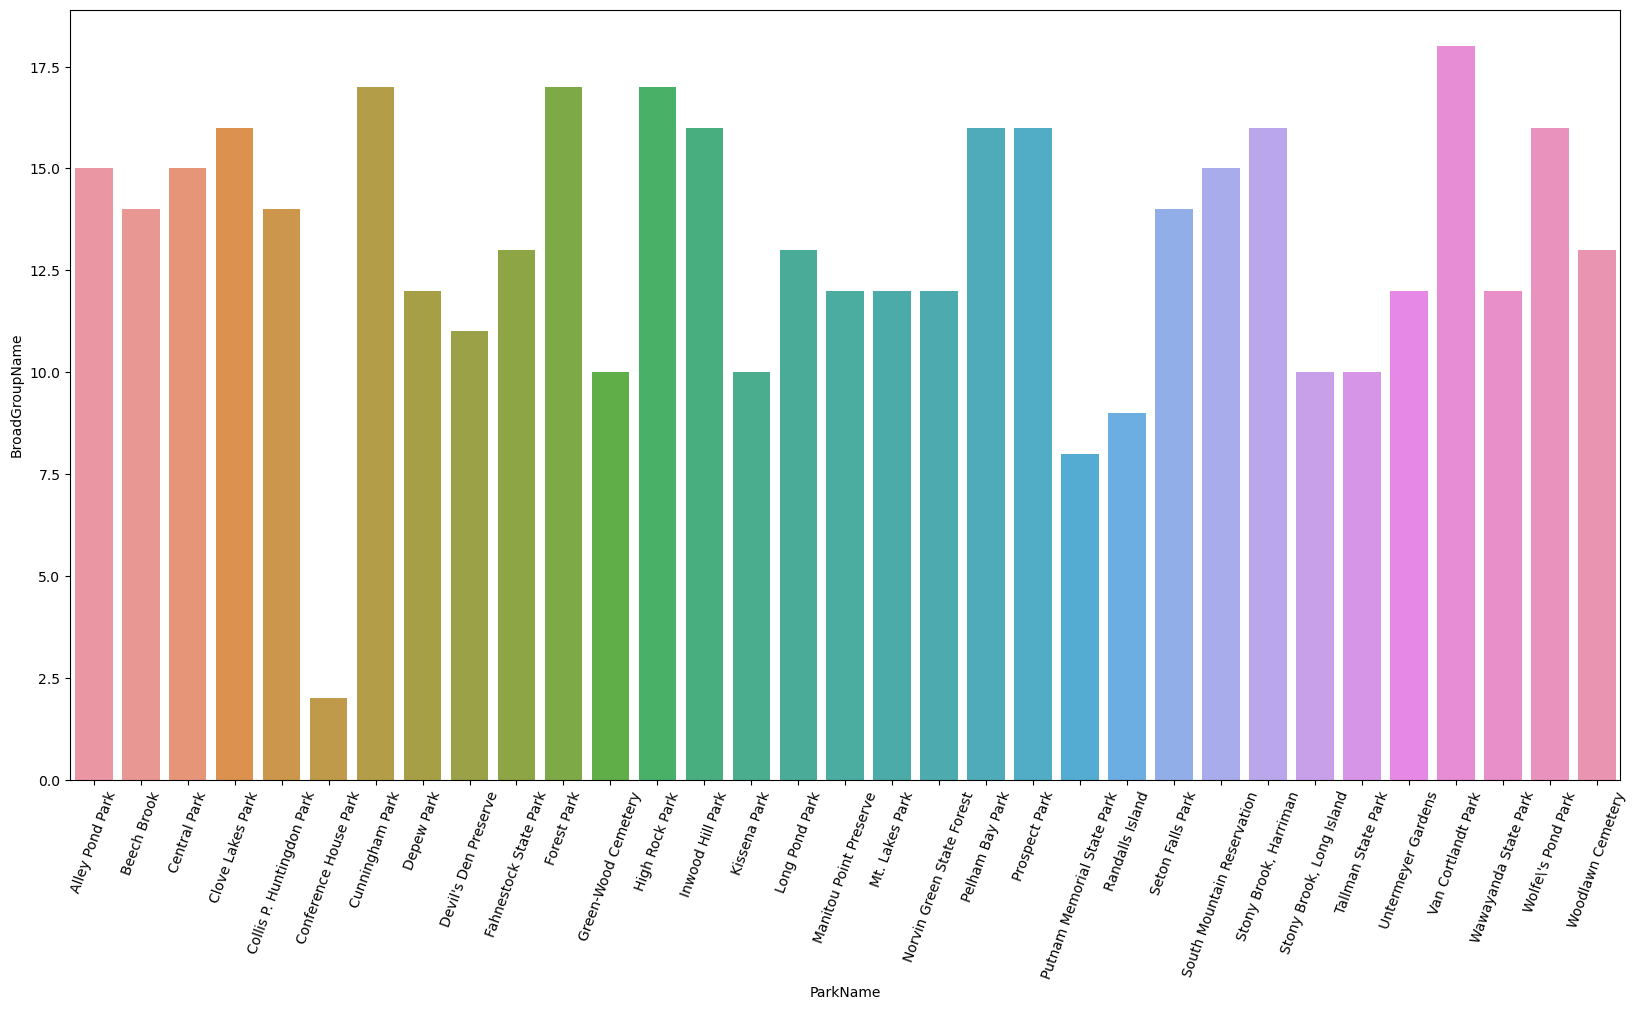

In [52]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=parks.groupby('ParkName').BroadGroupName.nunique().reset_index(),
            x='ParkName',y='BroadGroupName')
plt.xticks(rotation=70)
;

In [53]:
display(
    parks.loc[parks['NewToPark']=='y']
    .groupby(['ParkName'])
    .BroadGroupName.value_counts()
    .groupby(level=0, group_keys=True).head()
)

ParkName           BroadGroupName    
Alley Pond Park    Gilled Fungi          167
                   Ascomycetes           120
                   Polypores              52
                   Crusts & Parchment     48
                   Myxomycetes            25
                                        ... 
Woodlawn Cemetery  Gilled Fungi          128
                   Ascomycetes            39
                   Polypores              39
                   Boletes                33
                   Gasteromycetes         20
Name: count, Length: 160, dtype: int64

Genus-species is better than broad group for diversity.

In [54]:
parks.groupby('ParkName')['FullName'].nunique().sort_values(ascending=False)

ParkName
Van Cortlandt Park            767
High Rock Park                566
Cunningham Park               562
Stony Brook, Harriman         562
Inwood Hill Park              543
Pelham Bay Park               531
Wolfe\'s Pond Park            494
Alley Pond Park               493
Beech Brook                   474
Central Park                  470
Forest Park                   460
Prospect Park                 459
Clove Lakes Park              433
South Mountain Reservation    384
Woodlawn Cemetery             349
Depew Park                    243
Seton Falls Park              232
Wawayanda State Park          201
Long Pond Park                194
Fahnestock State Park         192
Untermeyer Gardens            190
Kissena Park                  184
Tallman State Park            174
Collis P. Huntingdon Park     167
Mt. Lakes Park                149
Green-Wood Cemetery           147
Devil's Den Preserve          145
Norvin Green State Forest     143
Manitou Point Preserve        136
Randa

''

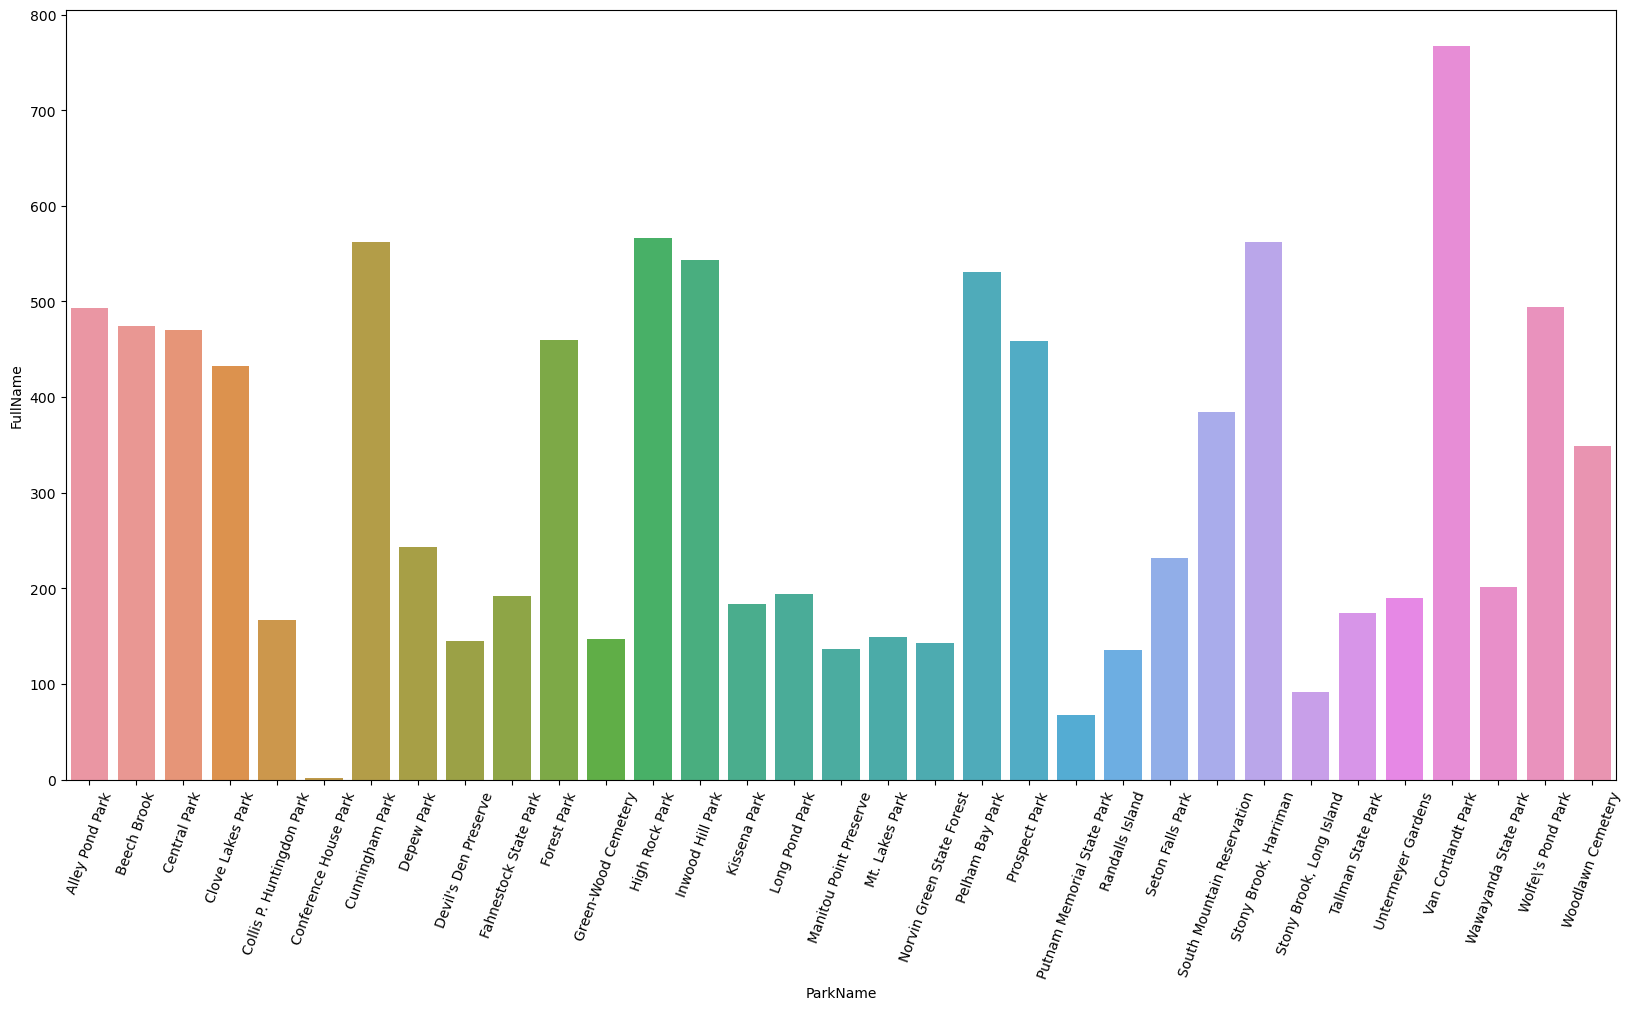

In [55]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=parks.groupby('ParkName')['FullName'].nunique().reset_index(),
            x='ParkName',y='FullName')
plt.xticks(rotation=70)
;

Can group by borough? Add a label to show?

### Is anything on a decline / are there any species becoming observed less frequently?

Let's look at species change over time similar to the lineplot above, but instead of grouped by month we'll just look at all time.

In [100]:
observations = dfs['observations'].merge(dfs['mushroom'][['MushroomID','BroadGroupID','Genus','Species']], 
                                         on='MushroomID', how='left')\
                                  .merge(dfs['broadgroups'][['BroadGroupID','BroadGroupName']], on='BroadGroupID', how='left')\
                                  .merge(dfs['walks'][['WalkID','ParkID','WalkDate']])\
                                  .drop(['Notes','LinkToINat','NewToPark','NewToCity','ParkID',
                                         'WalkID','ObservationID','DateCreated','DateModified'], axis=1)
observations['Date'] = observations['WalkDate'].dt.normalize()
months = {1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June',
          7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
observations['Month'] = observations['WalkDate'].dt.month.map(months)
observations['Week'] = observations.apply(lambda x: x['WalkDate'].isocalendar()[1], axis=1)
observations['Year'] = observations.apply(lambda x: x['WalkDate'].isocalendar()[0], axis=1)
observations['Month_Year'] = observations.apply(lambda x: f"{x['Month']}, {x['Year']}", axis=1)
observations['Week_Year'] = observations.apply(lambda x: f"Week {x['Week']}, {x['Year']}", axis=1)
observations['Quarter'] = observations['WalkDate'].dt.quarter
observations['Quarter_Year'] = observations.apply(lambda x: f"Q{x['Quarter']}, {x['Year']}", axis=1)
observations.head()

,MushroomID,BroadGroupID,Genus,Species,BroadGroupName,WalkDate,Date,Month,Week,Year,Month_Year,Week_Year,Quarter,Quarter_Year
0,300,3.0,Hortiboletus,campestris,Boletes,2009-06-28,2009-06-28,June,26,2009,"June, 2009","Week 26, 2009",2,"Q2, 2009"
1,2329,3.0,Boletus,subvelutipes-complex,Boletes,2009-06-28,2009-06-28,June,26,2009,"June, 2009","Week 26, 2009",2,"Q2, 2009"
2,3,3.0,Cyanoboletus,pulverulentus,Boletes,2009-06-28,2009-06-28,June,26,2009,"June, 2009","Week 26, 2009",2,"Q2, 2009"
3,4,3.0,Gyroporus,castaneus,Boletes,2009-06-28,2009-06-28,June,26,2009,"June, 2009","Week 26, 2009",2,"Q2, 2009"
4,5,3.0,Tylopilus,ferrugineus,Boletes,2009-06-28,2009-06-28,June,26,2009,"June, 2009","Week 26, 2009",2,"Q2, 2009"


In [124]:
df = pd.DataFrame(
    observations
    .groupby(['WalkDate'])
    .BroadGroupName.value_counts()
    .rolling(7).mean()
)
# df['rolling_week_mean'] = df.rolling(7).mean()
df

count
WalkDate   BroadGroupName               
2009-06-28 Gilled Fungi              NaN
           Boletes                   NaN
           Polypores                 NaN
           Gasteromycetes            NaN
           Crusts & Parchment        NaN
...                                  ...
2024-04-13 Rusts               12.714286
           Cyphelloid Fungi     8.428571
           Dimorphic Fungi      5.857143
           Gasteromycetes       4.142857
           Myxomycetes          2.428571

[3750 rows x 1 columns]

In [110]:
df = (
    observations
    .groupby(['WalkDate'])
    .BroadGroupName.value_counts()
    .groupby(level=0, group_keys=False).head(5)
)
# df.count.rolling(7).mean() 
df = df.set_index('WalkDate')
df.rolling(7)

Rolling [window=7,center=False,axis=0,method=single]

In [ ]:
df['moving'] = df.groupby(['col_1', 'col_2', 'col_3']).rolling(10)['value'].mean().droplevel(level=[0,1,2])


In [187]:
pd.DataFrame(
    observations
    .loc[observations['BroadGroupName'].isin(top_ten_groups)]
    .groupby('WalkDate')
    .BroadGroupName.value_counts()
    .rolling('7D').mean()
)

ValueError: window must be an integer 0 or greater

DataError: Cannot aggregate non-numeric type: object

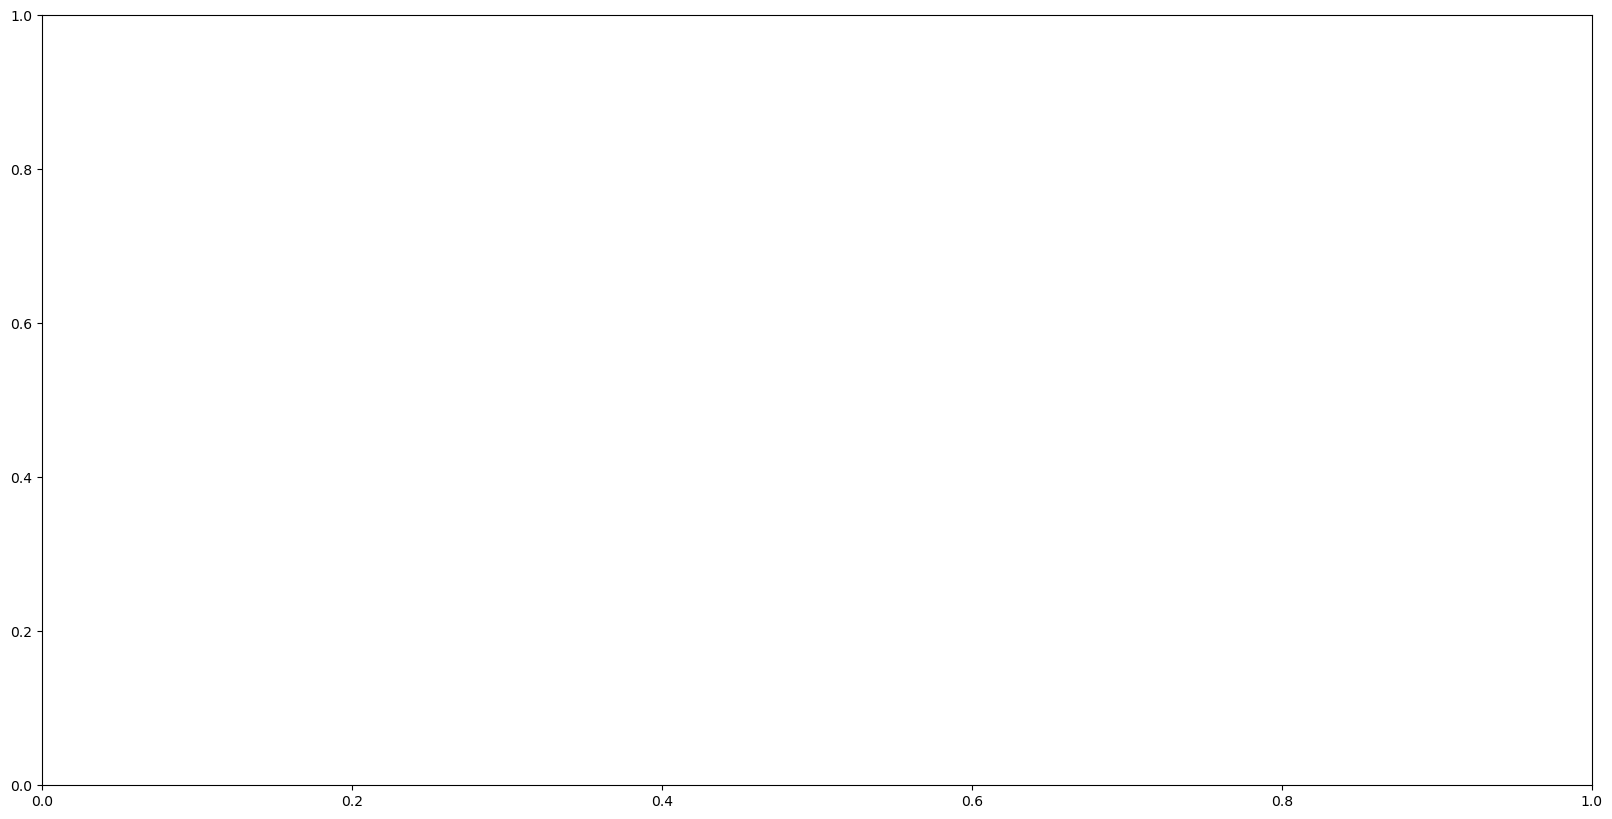

In [182]:
fig, ax = plt.subplots(figsize=(20,10))
top_ten_groups = list(observations['BroadGroupName'].value_counts().head(10).index)
df = pd.DataFrame(
    observations
    .loc[observations['BroadGroupName'].isin(top_ten_groups)]
    .groupby(['WalkDate', 'BroadGroupName'])
    .rolling('90D')[]
    .BroadGroupName.value_counts()
    .reset_index()
)
df.index = pd.DatetimeIndex(df['WalkDate'])
df = df.sort_index().drop('WalkDate', axis=1).rolling('90D').mean()
display(df)
sns.lineplot(df, x='WalkDate', y='count', hue='BroadGroupName')
plt.xticks(rotation=30)
;

''

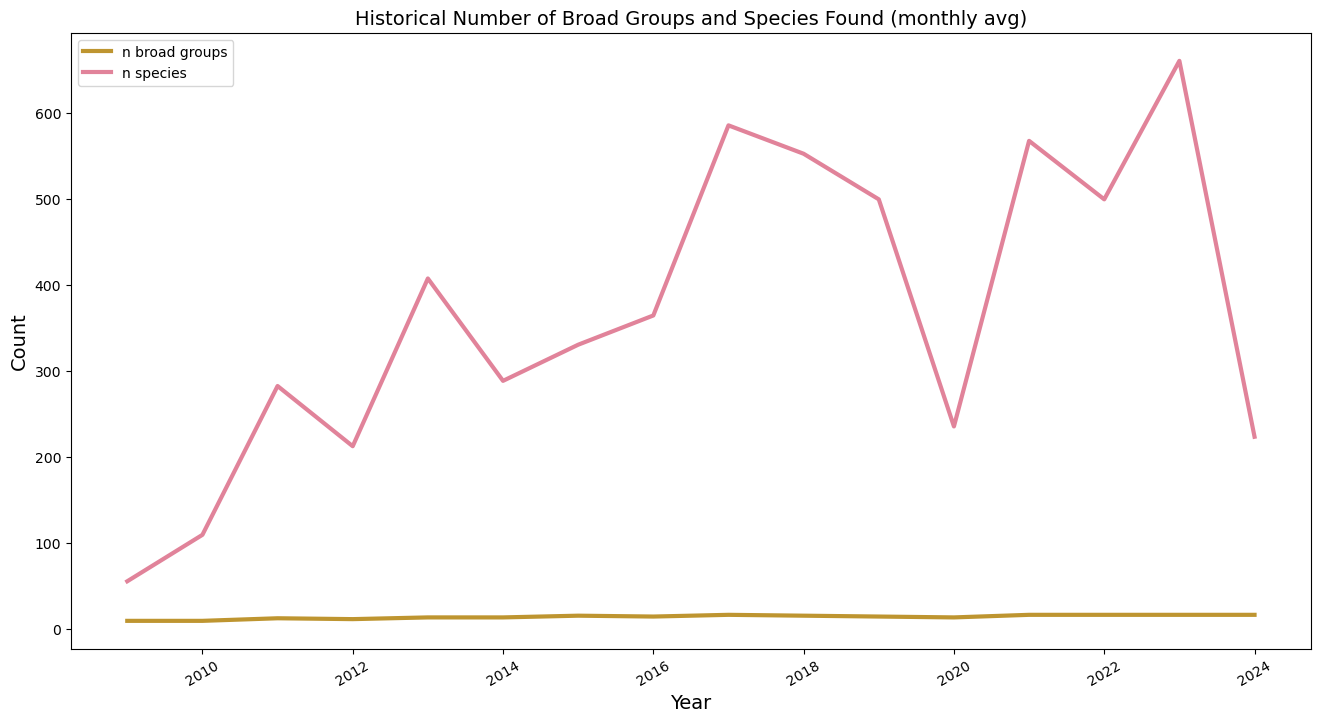

In [191]:
fig, ax = plt.subplots(figsize=(16,8))
rolling = 7
groupby = 'Year'
df_count_of_groups = (
    observations
    .groupby(groupby)
    .BroadGroupName.nunique()
    # .rolling(rolling).mean()
)
df_count_of_species = (
    observations
    .groupby(groupby)
    .Species.nunique()
    # .rolling(rolling).mean()
)
sns.lineplot(df_count_of_groups, color=COLORS[1], label='n broad groups', 
             linewidth=3, ax=ax)
sns.lineplot(df_count_of_species, color=COLORS[2], label='n species',
             linewidth=3, ax=ax)
plt.xlabel(groupby, fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Historical Number of Broad Groups and Species Found (monthly avg)", fontsize=14)
plt.legend()
plt.xticks(rotation=30)
;

What about just seeing general count of groups and species over time?